## Insurence Prediction Using Linear_Regression

#### 12 oct 2021

##### https://www.kaggle.com/mirichoi0218/insurance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()/df.sum().shape[0]*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['bmi'] = df['bmi'].astype(int)
df['charges'] = df['charges'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1338 non-null   int64 
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   int32 
 3   children  1338 non-null   int64 
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   int32 
dtypes: int32(2), int64(2), object(3)
memory usage: 62.8+ KB


<AxesSubplot:xlabel='children', ylabel='count'>

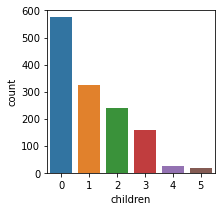

In [7]:
plt.figure(figsize= (3,3))
sb.countplot(x = 'children', data = df)

In [8]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

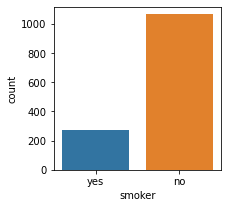

In [9]:
plt.figure(figsize= (3,3))
sb.countplot(x = 'smoker', data = df)

In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'resion')

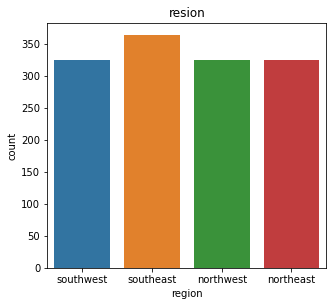

In [11]:
plt.figure(figsize= (5,4.5))
sb.countplot(x = 'region', data = df)
plt.title('resion')

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

E:\anaconda_installed\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


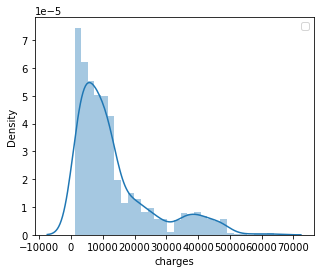

In [13]:
plt.figure(figsize = (5, 4) )
sb.distplot(df['charges'])
plt.legend()

E:\anaconda_installed\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


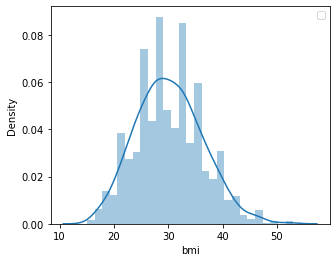

In [14]:
plt.figure(figsize = (5, 4) )
sb.distplot(df['bmi'])
plt.legend()

E:\anaconda_installed\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


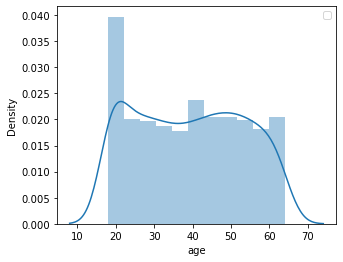

In [15]:
plt.figure(figsize = (5, 4) )
sb.distplot(df['age'])
plt.legend()

In [16]:
from pandas_profiling import ProfileReport
pr = ProfileReport(df)
pr.to_file(output_file = 'Outpur.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

E:\anaconda_installed\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.108437,0.042469,0.299009
bmi,0.108437,1.000000,0.011097,0.196188
children,0.042469,0.011097,1.000000,0.067999
charges,0.299009,0.196188,0.067999,1.000000


In [18]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27,0,yes,southwest,16884
1,18,male,33,1,no,southeast,1725
2,28,male,33,3,no,southeast,4449


### Converting Catagorical data to Numerical Data

In [19]:
df.replace({'sex':{'male':'1', 'female':'0'}}, inplace = True)

df.replace({'smoker':{'yes':1, 'no':0}}, inplace = True)

df.replace({'region':{'southwest':'1', 'southeast':2, 'northwest':'3', 'northeast':'4'}}, inplace = True)

In [20]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,1,16884
1,18,1,33,1,0,2,1725


In [21]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [22]:
y = df['charges']

In [23]:
model = LinearRegression()

In [24]:
model.fit(x,y)

LinearRegression()

In [25]:
model.predict([[30, 0,30, 2, 0, 1]])

array([5935.72796516])

In [26]:
model.score(x,y)

0.7507042188603441

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.1)

In [28]:
m = LinearRegression()
m.fit(x,y)

LinearRegression()

In [29]:
m.predict([[30,0,30,2,0,1]])

array([5935.72796516])

In [30]:
m.score(x,y)

0.7507042188603441